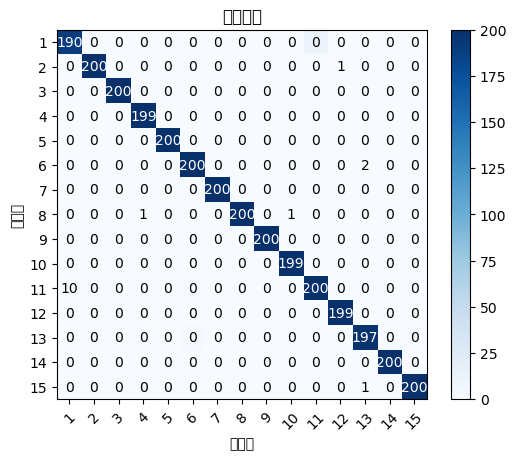

整体准确率:99.47%
--------------------------------
精确率:1:95.0%
精确率:2:100.0%
精确率:3:100.0%
精确率:4:99.5%
精确率:5:100.0%
精确率:6:100.0%
精确率:7:100.0%
精确率:8:100.0%
精确率:9:100.0%
精确率:10:99.5%
精确率:11:100.0%
精确率:12:99.5%
精确率:13:98.5%
精确率:14:100.0%
精确率:15:100.0%
--------------------------------
召回率:1:100.0%
召回率:2:99.5%
召回率:3:100.0%
召回率:4:100.0%
召回率:5:100.0%
召回率:6:99.01%
召回率:7:100.0%
召回率:8:99.01%
召回率:9:100.0%
召回率:10:100.0%
召回率:11:95.24%
召回率:12:100.0%
召回率:13:100.0%
召回率:14:100.0%
召回率:15:99.5%
--------------------------------
F1综合评价指标:1:97.44
F1综合评价指标:2:99.75
F1综合评价指标:3:100.0
F1综合评价指标:4:99.75
F1综合评价指标:5:100.0
F1综合评价指标:6:99.5
F1综合评价指标:7:100.0
F1综合评价指标:8:99.5
F1综合评价指标:9:100.0
F1综合评价指标:10:99.75
F1综合评价指标:11:97.56
F1综合评价指标:12:99.75
F1综合评价指标:13:99.24
F1综合评价指标:14:100.0
F1综合评价指标:15:99.75


In [4]:
# coding=utf-8
import matplotlib.pyplot as plt
import numpy as np
 
confusion = np.array(([190,0,0,0,0,0,0,0,0,0,10,0,0,0,0],
                      [0,200,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,200,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,199,0,0,0,1,0,0,0,0,0,0,0],
                      [0,0,0,0,200,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,200,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,200,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,200,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,200,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,1,0,199,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,200,0,0,0,0],
                      [0,1,0,0,0,0,0,0,0,0,0,199,0,0,0],
                      [0,0,0,0,0,2,0,0,0,0,0,0,197,0,1],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,200,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,200]
                      ))
classes=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
#画出混淆矩阵
def confusion_matrix(confMatrix):
    # 热度图，后面是指定的颜色块，可设置其他的不同颜色
    plt.imshow(confMatrix, cmap=plt.cm.Blues)
    # ticks 坐标轴的坐标点
    # label 坐标轴标签说明
    indices = range(len(confMatrix))
    # 第一个是迭代对象，表示坐标的显示顺序，第二个参数是坐标轴显示列表
    # plt.xticks(indices, [0, 1, 2])
    # plt.yticks(indices, [0, 1, 2])
    plt.xticks(indices, classes,rotation=45)
    plt.yticks(indices, classes)
 
    plt.colorbar()
 
    plt.xlabel('预测值')
    plt.ylabel('真实值')
    plt.title('混淆矩阵')
 
    # plt.rcParams两行是用于解决标签不能显示汉字的问题
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
 
    # 显示数据
    for first_index in range(len(confMatrix)):  # 第几行
        for second_index in range(len(confMatrix[first_index])):  # 第几列
            if first_index==second_index:
                plt.text(first_index, second_index, confMatrix[first_index][second_index],va='center',ha='center',color='white')
            else:
                plt.text(first_index, second_index, confMatrix[first_index][second_index], va='center', ha='center')
    # 在matlab里面可以对矩阵直接imagesc(confusion)
    # 显示
    plt.show()
 
 
#计算准确率
def calculate_all_prediction(confMatrix):
    '''
    计算总精度,对角线上所有值除以总数
    :return:
    '''
    total_sum=confMatrix.sum()
    correct_sum=(np.diag(confMatrix)).sum()
    prediction=round(100*float(correct_sum)/float(total_sum),2)
    print('整体准确率:'+str(prediction)+'%')
 
def calculae_lable_prediction(confMatrix):
    '''
    计算每一个类别的预测精度:该类被预测正确的数除以该类的总数
    '''
    l=len(confMatrix)
    for i in range(l):
        label_total_sum = confMatrix.sum(axis=1)[i]
        label_correct_sum=confMatrix[i][i]
        prediction = round(100 * float(label_correct_sum) / float(label_total_sum), 2)
        print('精确率:'+classes[i]+":"+str(prediction)+'%')
    
 
def calculate_label_recall(confMatrix):
    l = len(confMatrix)
    for i in range(l):
        label_total_sum = confMatrix.sum(axis=0)[i]
        label_correct_sum = confMatrix[i][i]
        prediction = round(100 * float(label_correct_sum) / float(label_total_sum), 2)
        print('召回率:'+classes[i] + ":" + str(prediction) + '%')
        
def calculate_label_f1(confMatrix):
    l = len(confMatrix)
    for i in range(l):
        label_total_sum_p = confMatrix.sum(axis=1)[i]
        label_correct_sum_p=confMatrix[i][i]
        prediction_p = round(100 * float(label_correct_sum_p) / float(label_total_sum_p), 2)
        # print('精确率:'+classes[i]+":"+str(prediction)+'%')
        label_total_sum_r = confMatrix.sum(axis=0)[i]
        label_correct_sum_r = confMatrix[i][i]
        prediction_r = round(100 * float(label_correct_sum_r) / float(label_total_sum_r), 2)
        # print('召回率:'+classes[i] + ":" + str(prediction) + '%')
        F1=(2*float(prediction_p)*float(prediction_r))/(float(prediction_p)+float(prediction_r))
        print('F1综合评价指标:'+classes[i] + ":" + str(round(F1,2) ))
        
 
 
confusion_matrix(confusion)
# print("--------------------------------")
calculate_all_prediction(confusion)
print("--------------------------------")
calculae_lable_prediction(confusion)
print("--------------------------------")
calculate_label_recall(confusion)
print("--------------------------------")
calculate_label_f1(confusion)

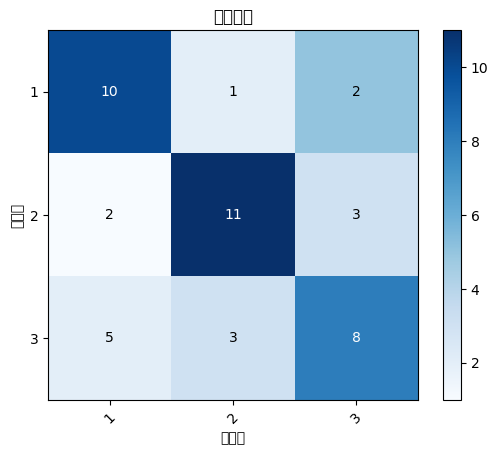

整体准确率:64.44%
--------------------------------
精确率:1:58.82%
精确率:2:73.33%
精确率:3:61.54%
--------------------------------
召回率:1:76.92%
召回率:2:68.75%
召回率:3:50.0%
--------------------------------
F1综合评价指标:1:66.66
F1综合评价指标:2:70.97
F1综合评价指标:3:55.17


In [7]:
# coding=utf-8
import matplotlib.pyplot as plt
import numpy as np
 
confusion = np.array(([10,2,5],
                      [1,11,3],
                      [2,3,8]
                      ))
classes=['1','2','3']
#画出混淆矩阵
def confusion_matrix(confMatrix):
    # 热度图，后面是指定的颜色块，可设置其他的不同颜色
    plt.imshow(confMatrix, cmap=plt.cm.Blues)
    # ticks 坐标轴的坐标点
    # label 坐标轴标签说明
    indices = range(len(confMatrix))
    # 第一个是迭代对象，表示坐标的显示顺序，第二个参数是坐标轴显示列表
    # plt.xticks(indices, [0, 1, 2])
    # plt.yticks(indices, [0, 1, 2])
    plt.xticks(indices, classes,rotation=45)
    plt.yticks(indices, classes)
 
    plt.colorbar()
 
    plt.xlabel('预测值')
    plt.ylabel('真实值')
    plt.title('混淆矩阵')
 
    # plt.rcParams两行是用于解决标签不能显示汉字的问题
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
 
    # 显示数据
    for first_index in range(len(confMatrix)):  # 第几行
        for second_index in range(len(confMatrix[first_index])):  # 第几列
            if first_index==second_index:
                plt.text(first_index, second_index, confMatrix[first_index][second_index],va='center',ha='center',color='white')
            else:
                plt.text(first_index, second_index, confMatrix[first_index][second_index], va='center', ha='center')
    # 在matlab里面可以对矩阵直接imagesc(confusion)
    # 显示
    plt.show()
 
 
#计算准确率
def calculate_all_prediction(confMatrix):
    '''
    计算总精度,对角线上所有值除以总数
    :return:
    '''
    total_sum=confMatrix.sum()
    correct_sum=(np.diag(confMatrix)).sum()
    prediction=round(100*float(correct_sum)/float(total_sum),2)
    print('整体准确率:'+str(prediction)+'%')
 
def calculae_lable_prediction(confMatrix):
    '''
    计算每一个类别的预测精度:该类被预测正确的数除以该类的总数
    '''
    l=len(confMatrix)
    for i in range(l):
        label_total_sum = confMatrix.sum(axis=1)[i]
        label_correct_sum=confMatrix[i][i]
        prediction = round(100 * float(label_correct_sum) / float(label_total_sum), 2)
        print('精确率:'+classes[i]+":"+str(prediction)+'%')
    
 
def calculate_label_recall(confMatrix):
    l = len(confMatrix)
    for i in range(l):
        label_total_sum = confMatrix.sum(axis=0)[i]
        label_correct_sum = confMatrix[i][i]
        prediction = round(100 * float(label_correct_sum) / float(label_total_sum), 2)
        print('召回率:'+classes[i] + ":" + str(prediction) + '%')
        
def calculate_label_f1(confMatrix):
    l = len(confMatrix)
    for i in range(l):
        label_total_sum_p = confMatrix.sum(axis=1)[i]
        label_correct_sum_p=confMatrix[i][i]
        prediction_p = round(100 * float(label_correct_sum_p) / float(label_total_sum_p), 2)
        # print('精确率:'+classes[i]+":"+str(prediction)+'%')
        label_total_sum_r = confMatrix.sum(axis=0)[i]
        label_correct_sum_r = confMatrix[i][i]
        prediction_r = round(100 * float(label_correct_sum_r) / float(label_total_sum_r), 2)
        # print('召回率:'+classes[i] + ":" + str(prediction) + '%')
        F1=(2*float(prediction_p)*float(prediction_r))/(float(prediction_p)+float(prediction_r))
        print('F1综合评价指标:'+classes[i] + ":" + str(round(F1,2) ))
        
 
 
confusion_matrix(confusion)
# print("--------------------------------")
calculate_all_prediction(confusion)
print("--------------------------------")
calculae_lable_prediction(confusion)
print("--------------------------------")
calculate_label_recall(confusion)
print("--------------------------------")
calculate_label_f1(confusion)